<a href="https://colab.research.google.com/github/therab6it/UCSD_CSE151A-SS1/blob/Milestone-2/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Submission for Milestone 2.

> Commit changes to the GitHub repo by clicking on *File > Save a copy in GitHub*. Select the correct repository (**/UCSD_151A-SS1**) and branch (**Milestone-2**) and include a meaningful commit message.



In [ ]:
# Data Exploration

In [ ]:
os.chdir('/content/drive/MyDrive/UCSD_CSE151A-SS1')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
from collections import Counter
import re
import csv

In [ ]:
votes_df = votes_df.drop(['Unnamed: 0'], axis=1)
votes_df.rename(columns={'name': 'bioguide_id'}, inplace=True)
merged_df = pd.merge(members_df, votes_df, on='bioguide_id', how='inner')

votes_df.rename(columns={'name': 'bioguide_id'}, inplace=True)
merged_df = pd.merge(members_df, votes_df, on='bioguide_id', how='inner')

df_melted = merged_df.melt(id_vars=['bioguide_id', 'full_name', 'state', 'gender', 'party'],
                    var_name='bill',
                    value_name='vote')

import re

def format_committee(cell):
    if cell is None:
        return None

    if not re.search('[a-zA-Z]', cell):
        return None

    parts = cell.split(maxsplit=1)
    if len(parts) == 2:
        formatted = f"{parts[0]}: {parts[1]}"
    elif len(parts) == 1:
        formatted = parts[0]
    else:
        formatted = ''

    return formatted

def strip_chars(cell):
    if isinstance(cell, str):
        return cell.replace(',', '').replace('(', '').replace(')', '').replace("'", '').strip()
    return cell

edited_bills = bills_df[['congress', 'bill_type', 'bill_number', 'committees']]
committees = edited_bills['committees'].str.split(')', n=5, expand=True)
committees = committees.applymap(strip_chars)
committees = committees.applymap(format_committee)

edited_bills = pd.merge(edited_bills, committees, left_index=True, right_index=True)
edited_bills = edited_bills.drop('committees', axis=1)
edited_bills['bill_number'] = edited_bills['bill_number'].fillna(0).astype(int)

edited_bills['bill_id'] = edited_bills.apply(lambda row: f"{row['congress']}_{row['bill_type']}_{row['bill_number']}", axis=1)
edited_bills = edited_bills.drop(['congress', 'bill_type', 'bill_number'], axis=1)

edited_bills_melted = edited_bills.melt(id_vars=['bill_id'], value_vars=[0, 1, 2, 3, 4, 5],
                     var_name='committee_number', value_name='committee')

edited_bills_melted = edited_bills_melted.dropna(subset=['committee'])

edited_bills_melted = edited_bills_melted.drop(columns=['committee_number'])

grouped_df = edited_bills_melted.groupby('committee')['bill_id'].agg(list).reset_index()

df_melted = df_melted[df_melted['vote'] != 'absent']

df_yea = df_melted[df_melted['vote'] == 'Yea']
df_nay = df_melted[df_melted['vote'] == 'Nay']

republicans = df_melted[df_melted['party'] == 'Republican']
democrats = df_melted[df_melted['party'] == 'Democrat']
independent = df_melted[df_melted['party'] == 'Independent']

democrats_yea = df_yea[df_yea['party'] == 'Democrat']

dem_bills = democrats_yea['bill'].unique()

edited_bills.columns = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'bill_id']



---



In [ ]:
# Plotting

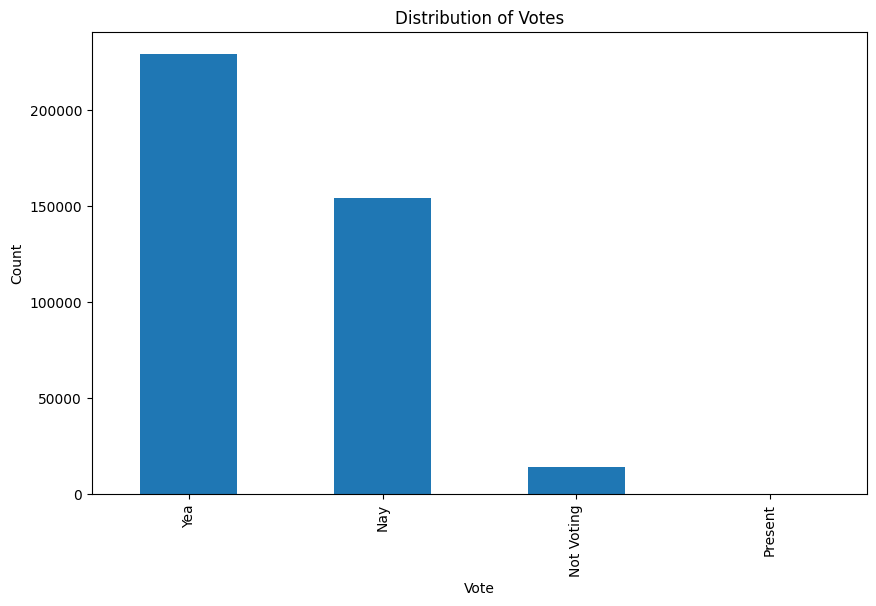

In [ ]:
# Bar chart of distribution of voting results
import pandas as pd
import matplotlib.pyplot as plt

votes_long_df = merged_df.melt(id_vars=['bioguide_id', 'full_name', 'state', 'gender', 'party'],
                               var_name='Resolution',
                               value_name='Vote')

votes_long_df = votes_long_df[votes_long_df['Vote'] != 'absent']

vote_counts = votes_long_df['Vote'].value_counts()

vote_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Vote')
plt.ylabel('Count')
plt.title('Distribution of Votes')
plt.show()

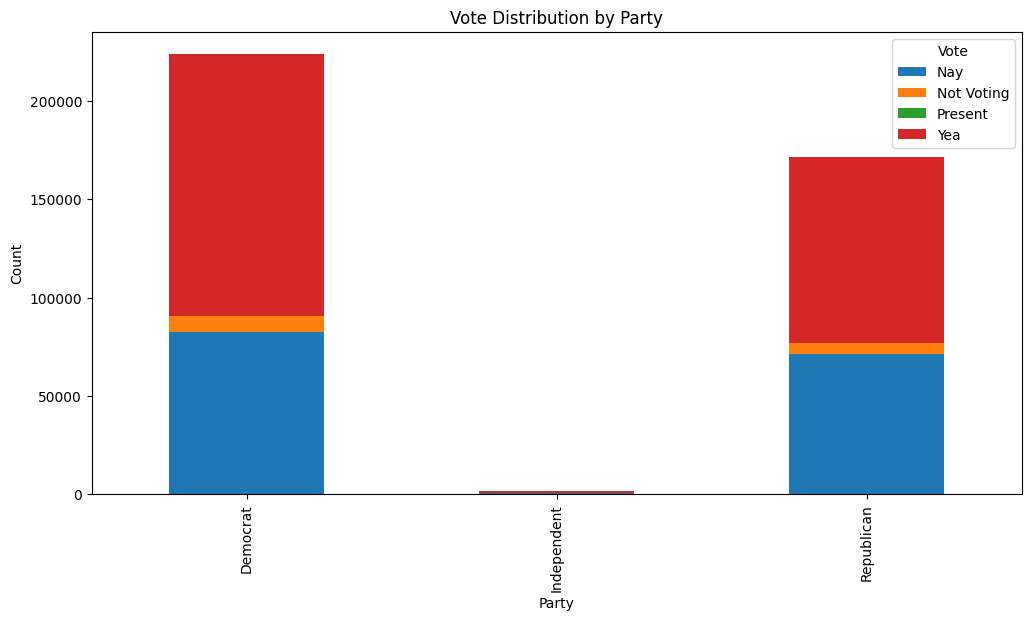

In [ ]:
# Voting tendencies of different political parties
votes_long_df = merged_df.melt(id_vars=['bioguide_id', 'full_name', 'state', 'gender', 'party'],
                               var_name='Resolution',
                               value_name='Vote')

votes_long_df = votes_long_df[votes_long_df['Vote'] != 'absent']

party_vote_counts = votes_long_df.groupby(['party', 'Vote']).size().unstack()

party_vote_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Party')
plt.ylabel('Count')
plt.title('Vote Distribution by Party')
plt.legend(title='Vote')
plt.show()

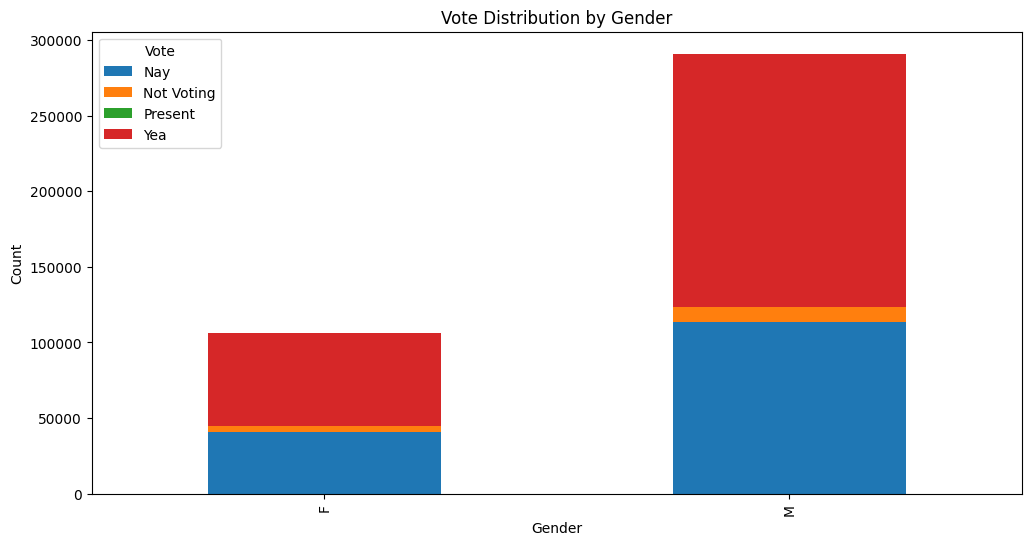

In [ ]:
# Gender Performance in Voting

gender_vote_counts = votes_long_df.groupby(['gender', 'Vote']).size().unstack()

gender_vote_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Vote Distribution by Gender')
plt.legend(title='Vote')
plt.show()

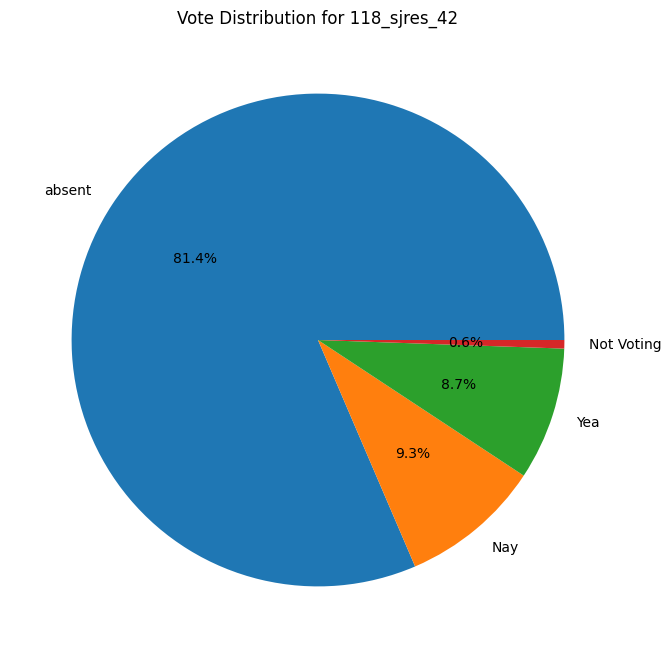

In [ ]:
# Voting results for different proposals

resolution = '118_sjres_42'

resolution_vote_counts = merged_df[resolution].value_counts()

resolution_vote_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title(f'Vote Distribution for {resolution}')
plt.ylabel('')
plt.show()



---



In [ ]:
# Data download

Here are the links we used to scrape the data \\
[Congressional voting datasets](https://github.com/unitedstates/congress) \\
[Bill text datasets](api.congress.gov)